In [1]:
import os
import cv2
import numpy as np
import json


In [2]:
# Function to load annotations from a JSON file
def load_annotations(annotation_file):
    with open(annotation_file, 'r') as f:
        return json.load(f)

In [3]:
annotation_files = ['D:\Projects\AICity\Tiles\Tiles\instances_1_2_3.json',
                    'D:\Projects\AICity\Tiles\Tiles\instances_4_5_6.json',
                    'D:\Projects\AICity\Tiles\Tiles\instances_7_8_9.json',
                    'D:\Projects\AICity\Tiles\Tiles\instances_10_11_12.json']

image_dir = 'D:\Projects\AICity\Tiles\Tiles'
output_dir = 'D:\Projects\AICity\Patch'
output_vis_dir = 'D:\Projects\AICity\Vis_Binary'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)
os.makedirs(output_vis_dir, exist_ok=True)

In [4]:
images = []
building_masks =[]
colour_masks=[]
texture_masks=[]
score_masks=[]
materials_masks=[]
for file in annotation_files:
    annotation_data=load_annotations(file)
    for image_info in annotation_data['images']:
        image_path = os.path.join(image_dir, image_info['file_name'])
        # Load the original image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        if image is None:
            print(f"Failed to load original image at {image_path}")
        else:
            print(f"Successfully load original image at {image_path}")
            images.append(image)
            building_masks.append(np.zeros(image.shape,int))
            colour_masks.append(np.zeros(image.shape,int))
            texture_masks.append(np.zeros(image.shape,int))
            score_masks.append(np.zeros(image.shape,int))
            materials_masks.append(np.zeros(image.shape,int))




Successfully load original image at D:\Projects\AICity\Tiles\Tiles\1.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\2.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\3.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\4.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\5.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\6.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\7.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\8.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\9.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\10.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\11.jpg
Successfully load original image at D:\Projects\AICity\Tiles\Tiles\12.jpg


In [5]:
#colour map
a_colour_map = {'White':[255,255,255],
                'Red':[163, 3, 3],
                'Black':[50, 50, 50],
                'Green':[50, 148, 43],
                'Blue':[53, 99, 184],
                'Brown':[140, 114, 52],
                'Grey':[126,126,126],
                'Orange':[222,127,49],
                'Yellow':[252, 240, 3]}

a_texture_map = {'Rough':[255,0,0],
                 'Average':[252, 240, 3],
                 'Smooth':[83, 217, 56]}

a_score_map = {'100':[76,175,80],
               '90':[139,195,74],
               '80':[205,220,57],
               '70':[225,235,59],
               '60':[255,152,0],
               '50':[255,87,34]
               }

a_material_map = {'Concrete':[74,20,140],
                  'Concrete Slate':[156,39,176],
                  'Concrete Tiles':[206,147,216],
                  'Concrete Ballast':[123,31,162],
                  'Metal':[144,164,174],
                  'Metal Tile':[207,216,220],
                  'Steel':[255,249,196],
                  'Green':[102,187,106],
                  'Tiles':[144,202,249],
                  'Glass':[0,188,212],
                  'Asphalt Shingles':[140, 114, 52],
                  'Bitumen':[38,50,56],
                  'EPDM':[141,110,99],
                  'Slate':[253,51,53],
                  'Stone Tile':[239,154,154],
                  'Complex':[205,220,57],
                  'Solar':[1,87,155]
               }
               

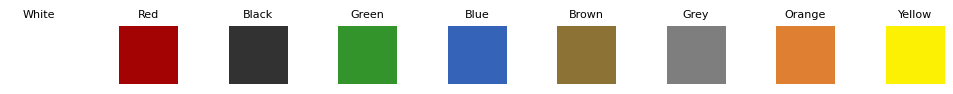

In [6]:
#colourmap legend
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,len(a_colour_map),figsize=(10,len(a_colour_map)*5))
f.tight_layout()
for idx,item in enumerate(a_colour_map):
    block=np.zeros(shape=(100,100,3),dtype=int)
    block[:,:,0]=a_colour_map[item][0]#R
    block[:,:,1]=a_colour_map[item][1]#G
    block[:,:,2]=a_colour_map[item][2]#B
    ax[idx].imshow(block)
    ax[idx].set_title(item,fontsize=8)
    ax[idx].axis('off')

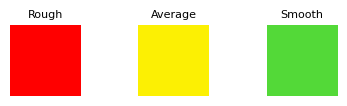

In [7]:
f,ax = plt.subplots(1,len(a_texture_map),figsize=(4,4))
f.tight_layout()
for idx,item in enumerate(a_texture_map):
    block=np.zeros(shape=(100,100,3),dtype=int)
    block[:,:,0]=a_texture_map[item][0]#R
    block[:,:,1]=a_texture_map[item][1]#G
    block[:,:,2]=a_texture_map[item][2]#B
    ax[idx].imshow(block)
    ax[idx].set_title(item,fontsize=8)
    ax[idx].axis('off')

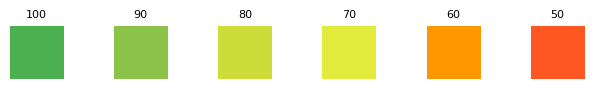

In [8]:
f,ax = plt.subplots(1,len(a_score_map))
f.tight_layout()
for idx,item in enumerate(a_score_map):
    block=np.zeros(shape=(100,100,3),dtype=int)
    block[:,:,0]=a_score_map[item][0]#R
    block[:,:,1]=a_score_map[item][1]#G
    block[:,:,2]=a_score_map[item][2]#B
    ax[idx].imshow(block)
    ax[idx].set_title(item,fontsize=8)
    ax[idx].axis('off')

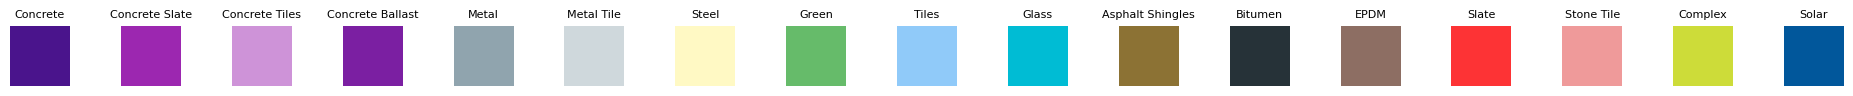

In [9]:
f,ax = plt.subplots(1,len(a_material_map),figsize=(19,8))
f.tight_layout()
for idx,item in enumerate(a_material_map):
    block=np.zeros(shape=(100,100,3),dtype=int)
    block[:,:,0]=a_material_map[item][0]#R
    block[:,:,1]=a_material_map[item][1]#G
    block[:,:,2]=a_material_map[item][2]#B
    ax[idx].imshow(block)
    ax[idx].set_title(item,fontsize=8)
    ax[idx].axis('off')

In [10]:
for i,file in enumerate(annotation_files):
    annotation_data=load_annotations(file)
    for annotation in annotation_data['annotations']:
        #get annotation values from the datafile
        id = annotation['id']
        image_idx = annotation['image_id']
        region = annotation['segmentation']
        area = annotation['area']
        bbox = annotation['bbox']
        a_colour = annotation['attributes']['Colours']
        a_texture = annotation['attributes']['Textures']
        a_score = annotation['attributes']['Score']
        a_materials = annotation['attributes']['Materials']
        a_occluded = annotation['attributes']['occluded']
        
        #Building Visualisation
        polygon = np.reshape(region,(int(np.size(region)/2),2)).astype(np.int32).reshape((-1, 1, 2))#format change to opencv polygon x and y pairs
        building_masks[i*3+image_idx-1]  = cv2.fillPoly(building_masks[i*3+image_idx-1] ,[polygon],color=(255,255,255))

        #Colour Visualisation
        polygon = np.reshape(region,(int(np.size(region)/2),2)).astype(np.int32).reshape((-1, 1, 2))
        p_color = tuple(a_colour_map[a_colour])
        colour_masks[i*3+image_idx-1] = cv2.fillPoly(colour_masks[i*3+image_idx-1],[polygon],color=p_color)
        
        #Texture Visualisation
        polygon = np.reshape(region,(int(np.size(region)/2),2)).astype(np.int32).reshape((-1, 1, 2))
        p_color = tuple(a_texture_map[a_texture])
        texture_masks[i*3+image_idx-1] = cv2.fillPoly(texture_masks[i*3+image_idx-1],[polygon],color=p_color)

        #Score Visualisation
        polygon = np.reshape(region,(int(np.size(region)/2),2)).astype(np.int32).reshape((-1, 1, 2))
        p_color = tuple(a_score_map[a_score])
        score_masks[i*3+image_idx-1] = cv2.fillPoly(score_masks[i*3+image_idx-1],[polygon],color=p_color)

        #Material Visualisation
        polygon = np.reshape(region,(int(np.size(region)/2),2)).astype(np.int32).reshape((-1, 1, 2))
        p_color = tuple(a_material_map[a_materials])
        materials_masks[i*3+image_idx-1] = cv2.fillPoly(materials_masks[i*3+image_idx-1],[polygon],color=p_color)


In [11]:
from ipywidgets import interact 
def vis_function(display): 
    
    f,ax=plt.subplots(4,3,figsize=(15,15))
    
    if display=='orignal':
        vis_set = images
    if display=='building':
        vis_set = building_masks
    if display=='colour':
        vis_set = colour_masks
    if display=='texture':
        vis_set = texture_masks
    if display=='score':
        vis_set = score_masks
    if display=='material':
        vis_set = materials_masks
    ax[0][0].imshow(vis_set[11])
    ax[0][1].imshow(vis_set[10])
    ax[0][2].imshow(vis_set[9])
    ax[1][0].imshow(vis_set[6])
    ax[1][1].imshow(vis_set[7])
    ax[1][2].imshow(vis_set[8])
    ax[2][0].imshow(vis_set[5])
    ax[2][1].imshow(vis_set[4])
    ax[2][2].imshow(vis_set[3])
    ax[3][0].imshow(vis_set[0])
    ax[3][1].imshow(vis_set[1])
    ax[3][2].imshow(vis_set[2])
    ax_flatten = ax.flatten()
    for each_ax in ax_flatten:
        each_ax.axis('off')

interact(vis_function, display=['orignal','building','colour','texture','score','material']); 

interactive(children=(Dropdown(description='display', options=('orignal', 'building', 'colour', 'texture', 'sc…

In [12]:
for i,image in enumerate(building_masks):
    image = cv2.cvtColor(image.astype('uint8'),cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'Vis_Binary/building_mask{i}.png',image)

In [13]:
for i,image in enumerate(colour_masks):
    image = cv2.cvtColor(image.astype('uint8'),cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'Vis_Binary/colour_mask{i}.png',image)

In [14]:
for i,image in enumerate(texture_masks):
    image = cv2.cvtColor(image.astype('uint8'),cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'Vis_Binary/texture_mask{i}.png',image)

In [15]:
for i,image in enumerate(score_masks):
    image = cv2.cvtColor(image.astype('uint8'),cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'Vis_Binary/score_mask{i}.png',image)

In [16]:
for i,image in enumerate(materials_masks):
    image = cv2.cvtColor(image.astype('uint8'),cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'Vis_Binary/material_mask{i}.png',image)